# 2d

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from src.utils.geometric_transformations import coordinates_to_grid_indices, grid_indices_to_world_coordinates

In [89]:
grid = np.zeros((10,10))
origin = [5,5]

In [90]:
theta = -30 * np.pi / 180
sin = np.sin(theta)
cos = np.cos(theta)
sec = 1/cos
cosec = 1/sin

sgnsin = np.sign(sin).astype(int)
sgncos = np.sign(cos).astype(int)


In [116]:
p = 0.1
grid = np.random.choice([0, 1], size = grid.shape, p = [1-p, p])

In [117]:
x,y = 0,0
i,j = origin

# if we are travelling in the negative direction, subract 1 from the index
i -= int(sgncos<0)
j -= int(sgnsin<0)

intersections = [(x,y)]
resolution = 1

In [118]:
while grid[i,j] == 0:
    print(f"x = {x}, y = {y}, i = {i}, j = {j}")
    x_next = resolution*(i - origin[0] + int(sgncos>0))
    y_next = resolution*(j - origin[1] + int(sgnsin>0))
    
    dt_x = (x_next - x) * sec
    dt_y = (y_next - y) * cosec
    
    
    
    
    if dt_x < dt_y:
        i += sgncos
        x = x_next
        y += dt_x * sin
    else:
        j += sgnsin
        y = y_next
        x += dt_y * cos
    intersections.append((x,y))
    print(f"x_next = {x_next}, y_next = {y_next}, dt_x = {dt_x}, dt_y = {dt_y}")

x = 0, y = 0, i = 5, j = 4
x_next = 1, y_next = -1, dt_x = 1.1547005383792515, dt_y = 2.0000000000000004
x = 1, y = -0.5773502691896256, i = 6, j = 4
x_next = 2, y_next = -1, dt_x = 1.1547005383792515, dt_y = 0.845299461620749
x = 1.7320508075688776, y = -1, i = 6, j = 3
x_next = 2, y_next = -2, dt_x = 0.30940107675850265, dt_y = 2.0000000000000004
x = 2, y = -1.1547005383792512, i = 7, j = 3
x_next = 3, y_next = -2, dt_x = 1.1547005383792515, dt_y = 1.690598923241498
x = 3, y = -1.7320508075688767, i = 8, j = 3
x_next = 4, y_next = -2, dt_x = 1.1547005383792515, dt_y = 0.5358983848622466
x = 3.4641016151377557, y = -2, i = 8, j = 2
x_next = 4, y_next = -3, dt_x = 0.6188021535170047, dt_y = 2.0000000000000004


In [119]:
intersections

[(0, 0),
 (1, -0.5773502691896256),
 (1.7320508075688776, -1),
 (2, -1.1547005383792512),
 (3, -1.7320508075688767),
 (3.4641016151377557, -2),
 (4, -2.3094010767585025)]

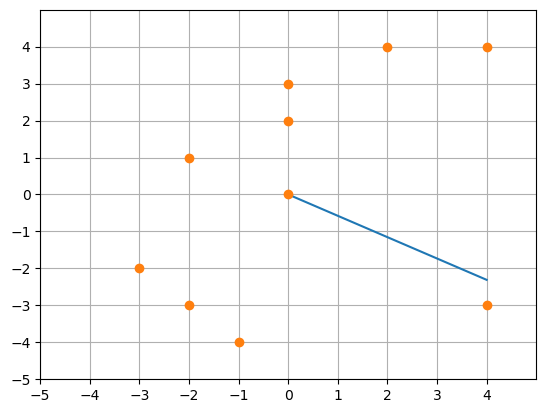

In [121]:
grid_indices = np.array(np.where(grid)).transpose()
coords = grid_indices_to_world_coordinates(grid_indices, origin, resolution)

xmin = -resolution*origin[0]
xmax = resolution*(grid.shape[0] - origin[0])

ymin = -resolution*origin[1]
ymax = resolution*(grid.shape[1] - origin[1])

plt.plot([x[0] for x in intersections], [x[1] for x in intersections])

plt.plot(coords[:,0], coords[:,1], 'o')

plt.grid()
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xticks(np.arange(xmin, xmax, resolution))
plt.yticks(np.arange(ymin, ymax, resolution))
plt.show()

#### Optimize 2D case

In [592]:
grid = np.zeros((30,30))
origin = [15,15]

p = 0.2
grid = np.random.choice([0, 1], size = grid.shape, p = [1-p, p])

In [599]:
grid_classes = np.random.choice([1,2,3,4,5], size = grid.shape)

In [604]:
theta = np.arange(0.1, 359.9, 0.5) * np.pi / 180
sin = np.sin(theta)
cos = np.cos(theta)
sec = 1/cos
cosec = 1/sin

sgnsin = np.sign(sin).astype(int)
sgncos = np.sign(cos).astype(int)


x_arr,y_arr = np.zeros_like(theta), np.zeros_like(theta)
indices = np.arange(len(theta))

i,j = np.ones_like(theta, dtype=int)*origin[0], np.ones_like(theta, dtype=int)*origin[1]

# if we are travelling in the negative direction, subract 1 from the index
i -= (sgncos<0).astype(int)
j -= (sgnsin<0).astype(int)

intersections = {index: [(x,y)] for index, x, y in zip(indices, x_arr, y_arr)}
resolution = 1

active_rays = np.ones_like(theta, dtype=bool)

rays_to_deactivate = np.where(grid[i,j])
active_rays[rays_to_deactivate] = False
flatnonzero = np.flatnonzero(active_rays)

while flatnonzero.size:        
    x_next = resolution*(i[active_rays] - origin[0] + (sgncos[active_rays]>0).astype(int))
    y_next = resolution*(j[active_rays] - origin[1] + (sgnsin[active_rays]>0).astype(int))
    dt_x = (x_next - x_arr[active_rays]) * sec[active_rays]
    dt_y = (y_next - y_arr[active_rays]) * cosec[active_rays]
        
    dt_x_smaller = dt_x < dt_y
    smaller = flatnonzero[dt_x_smaller]
    i[smaller] += sgncos[smaller]
    x_arr[smaller] = x_next[dt_x_smaller]
    y_arr[smaller] += dt_x[dt_x_smaller] * sin[smaller]

    dt_y_smaller =  np.invert(dt_x_smaller)
    bigger = flatnonzero[dt_y_smaller]
    j[bigger] += sgnsin[bigger]
    y_arr[bigger] = y_next[dt_y_smaller]
    x_arr[bigger] += dt_y[dt_y_smaller] * cos[bigger]
        
        
    for index, x,y, active in zip(indices, x_arr, y_arr, active_rays):
        if active:
            intersections[index].append((x,y))

    rays_to_deactivate = np.where(grid[i,j])
    active_rays[rays_to_deactivate] = False
    flatnonzero = np.flatnonzero(active_rays)
    
ray_classes = grid_classes[i,j]

In [613]:
def draw_voxel(x,y, c='black'):
    plt.plot([x,x+1,x+1,x,x], [y,y,y+1,y+1,y], c=c)

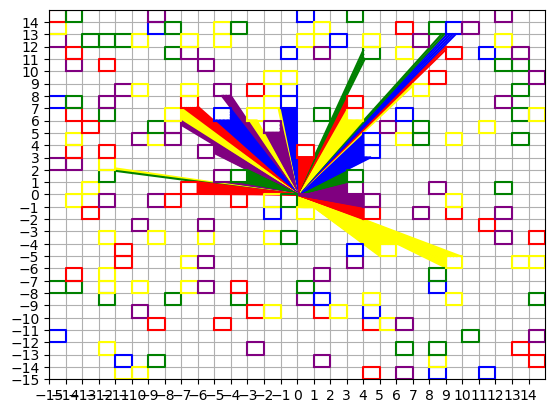

In [614]:
grid_indices = np.array(np.where(grid)).transpose()
coords = grid_indices_to_world_coordinates(grid_indices, origin, resolution)

xmin = -resolution*origin[0]
xmax = resolution*(grid.shape[0] - origin[0])

ymin = -resolution*origin[1]
ymax = resolution*(grid.shape[1] - origin[1])
ray_classes_colors = ['red', 'green', 'blue', 'yellow', 'purple']

for intersection_list, ray_class in zip(intersections.values(), ray_classes):
    plt.plot([intersection_list[0][0], intersection_list[-1][0]], [intersection_list[0][1], intersection_list[-1][1]], c = ray_classes_colors[ray_class-1])

for (x,y), c in zip(coords, grid_classes[grid>0]):
    draw_voxel(x,y, ray_classes_colors[c-1])

plt.grid()
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xticks(np.arange(xmin, xmax, resolution))
plt.yticks(np.arange(ymin, ymax, resolution))
plt.show()